<a href="https://colab.research.google.com/github/ttezy/Time-Sequence-Analysis/blob/main/FB_Prophet_Multivariate_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load Data**

## **Import libraries**

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


from fbprophet import Prophet

from sklearn.metrics import mean_squared_error
from math import sqrt

## **Load Dataset**

In [70]:
df=pd.read_csv('pollution.csv',header=0, index_col=0)
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


## **Visualize the data**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efd2bef4110>,
      dtype=object)

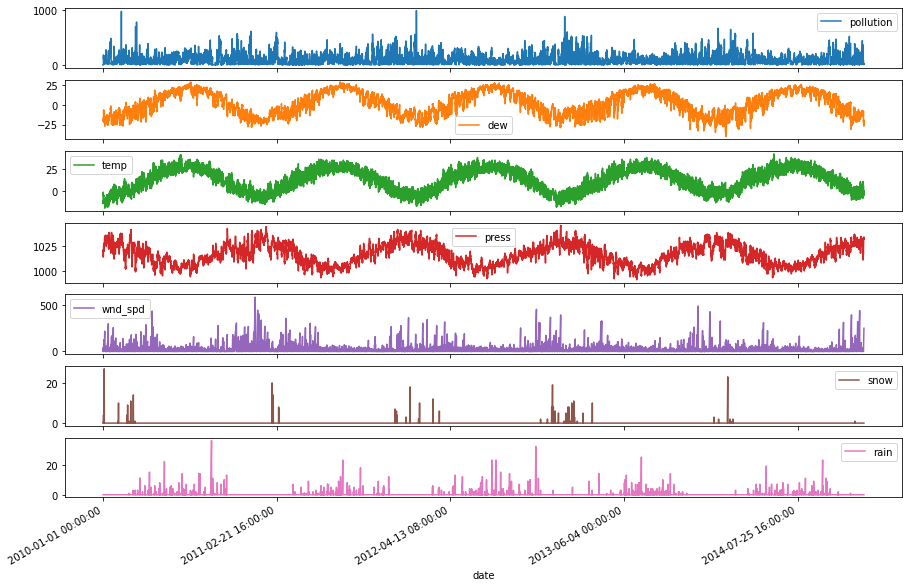

In [71]:
df.plot(subplots=True, figsize=(15,10), legend=True)

# **Step 2: Preprocess the data**

## **Encode wind direction**

In [72]:
values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
# ensure all data is float
values = values.astype('float32')

df['wnd_dir'] = values[:, 4]

df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Rename "date" as "ds" and "pollution" with "y"**

In [73]:
df_processed = df.reset_index().rename({'date':'ds', 'pollution':'y'}, axis='columns')
df_processed.head()

,ds,y,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Split the train set and the test set**

In [74]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = df_processed[:n_train_hours]
test = df_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 9)
test shape: (4383, 8)
y_true shape: (4383,)


# **Step 3: Train Prophet Model by past 1 step**

## **Show the columns' name**

In [75]:
print(df_processed.columns)

Index(['ds', 'y', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow',
       'rain'],
      dtype='object')


## **Build prophet model**

In [76]:
# model = Prophet(interval_width=0.95)

# # modify here to choose variates
# model.add_regressor('dew')
# model.add_regressor('temp')
# model.add_regressor('press')
# model.add_regressor('wnd_dir')
# model.add_regressor('wnd_spd')
# model.add_regressor('snow')

## **Fit model to the. train data**

In [77]:
# model.fit(train)

In [78]:
# model.params

# **Step 4: Implement data forecasting by past 1 step**

## **Show the test set info**

In [79]:
# test.head()

## **Predict future value**

In [80]:
# result = model.predict(test)
# prediction = result['yhat']
# print("prediction shape:", prediction.shape)

## **Calculate RMSE**

In [81]:
# rmse = sqrt(mean_squared_error(prediction, y_true))
# print('Test RMSE: %.3f' % rmse)

## **Show prediction results**

In [82]:
# plt.figure(figsize=(15, 8))
# plt.plot(y_true[:200], label='Ground Truth')
# plt.plot(prediction[:200], label='Prediction')
# plt.title("FB Prophet")
# plt.legend()
# plt.show()

In [83]:
# plt.figure(figsize=(25, 5))
# plt.plot(y_true[:2000], label='Ground Truth')
# plt.plot(prediction[:2000], label='Prediction')
# plt.title("FB Prophet")
# plt.legend()
# plt.show()

In [84]:
# model.plot(result)

In [85]:
# model.plot_components(result)

# **Step 5: Train prophet model and predict future 1 step by past 24 steps**

## **Reframe dataset for supervised learning**

In [86]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in-1, -1, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i+1)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i-1)[0])
        if i == 0:
            names += ['var1(t)' ]
        else:
            names += [('var1(t+%d)' % (i))]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [87]:
pastStep = 24 # modify here to choose past steps
maxFutureStep = 24  # modify here to choose future steps
futureStep = 1

# frame as supervised learning
reframed = series_to_supervised(df.values, pastStep, futureStep)
reframed['ds'] = df_processed['ds'].shift(-1)[pastStep-1:]
reframed_processed = reframed.rename({'var1(t)':'y'}, axis='columns')


print(reframed_processed.shape)
print(reframed_processed.head())

(43800, 194)
    var1(t-24)  var2(t-24)  var3(t-24)  ...  var8(t-1)      y                   ds
23         0.0       -21.0       -11.0  ...        0.0  129.0  2010-01-02 00:00:00
24         0.0       -21.0       -12.0  ...        0.0  148.0  2010-01-02 01:00:00
25         0.0       -21.0       -11.0  ...        0.0  159.0  2010-01-02 02:00:00
26         0.0       -21.0       -14.0  ...        0.0  181.0  2010-01-02 03:00:00
27         0.0       -20.0       -12.0  ...        0.0  138.0  2010-01-02 04:00:00

[5 rows x 194 columns]


## **Split the train set and the test set**

In [107]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = reframed_processed[:n_train_hours]
test = reframed_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 194)
test shape: (4359, 193)
y_true shape: (4359,)


## **Train the model by using past 24 steps**

In [108]:
model = Prophet(interval_width=0.95)

names = list()
for i in range(pastStep, 0, -1):
  names += [('var%d(t-%d)' % (j + 1, i)) for j in range(8)]

for variable in names:
  model.add_regressor(variable)

In [109]:
model.fit(train)

## **Implement prediction**

In [110]:
result = model.predict(test)
prediction = result['yhat']
print("prediction shape:", prediction.shape)

prediction shape: (4359,)


## **Calculate RMSE**

In [111]:
rmse = sqrt(mean_squared_error(prediction, y_true))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21.532


## **Show prediction results**

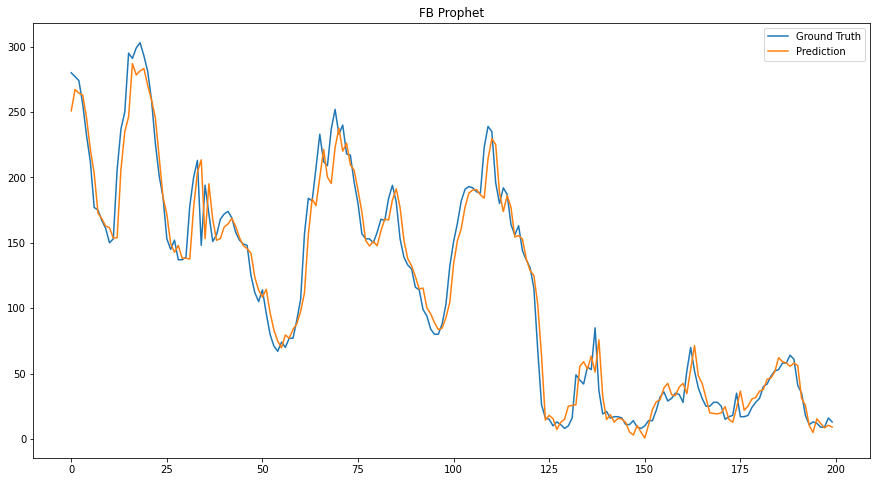

In [112]:
plt.figure(figsize=(15, 8))
plt.plot(y_true[:200], label='Ground Truth')
plt.plot(prediction[:200], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

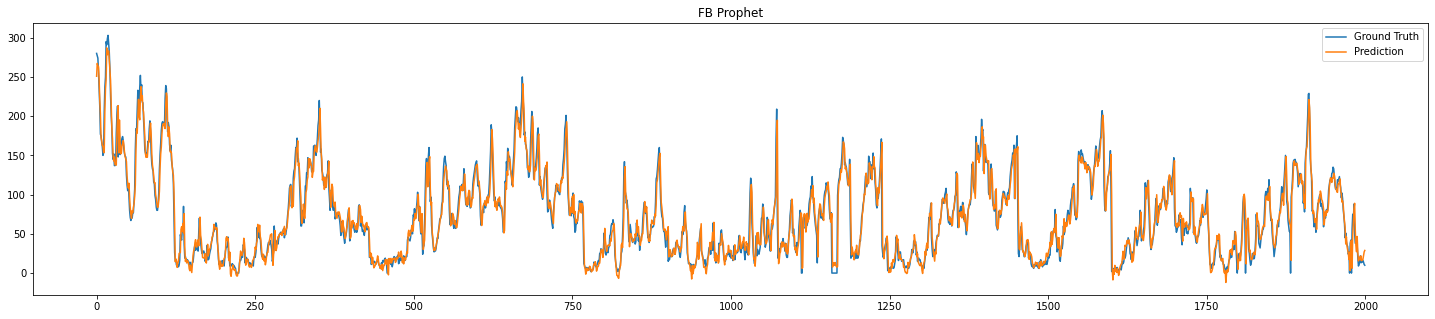

In [113]:
plt.figure(figsize=(25, 5))
plt.plot(y_true[:2000], label='Ground Truth')
plt.plot(prediction[:2000], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

# **Step 6: Train prophet model and predict future several steps by past 24 steps**

## **Split the train set and test set**

In [95]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = df_processed[:n_train_hours]
test = df_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 9)
test shape: (4383, 8)
y_true shape: (4383,)


In [96]:
dew_train = train[['dew', 'ds']].rename({'dew':'y'}, axis='columns')
temp_train = train[['temp', 'ds']].rename({'temp':'y'}, axis='columns')
press_train = train[['press', 'ds']].rename({'press':'y'}, axis='columns')
wnd_dir_train = train[['wnd_dir', 'ds']].rename({'wnd_dir':'y'}, axis='columns')
wnd_spd_train = train[['wnd_spd', 'ds']].rename({'wnd_spd':'y'}, axis='columns')
snow_train = train[['snow', 'ds']].rename({'snow':'y'}, axis='columns')

In [97]:
dew_test = test[['dew', 'ds']].rename({'dew':'y'}, axis='columns')
temp_test = test[['temp', 'ds']].rename({'temp':'y'}, axis='columns')
press_test = test[['press', 'ds']].rename({'press':'y'}, axis='columns')
wnd_dir_test = test[['wnd_dir', 'ds']].rename({'wnd_dir':'y'}, axis='columns')
wnd_spd_test = test[['wnd_spd', 'ds']].rename({'wnd_spd':'y'}, axis='columns')
snow_test = test[['snow', 'ds']].rename({'snow':'y'}, axis='columns')

In [98]:
# def var_prediction(var_name, dataset, trainingSize, predSize, futureStep):
#   print("start to predict%10s"%var_name)
#   prediction = np.array([])
#   if predSize > len(test):
#     predSize = len(test)
#   for i in range(0, predSize, futureStep-1):
#     var_train = dataset[[var_name, 'ds']][n_train_hours-trainingSize+i:n_train_hours+i].rename({var_name:'y'}, axis='columns')  #-100:0
  
#     var_model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
#     var_model.fit(var_train)

#     future = var_model.make_future_dataframe(periods = futureStep, include_history = False)
#     pred = var_model.predict(future)
#     pred = pred[:predSize]
#     prediction = np.append(prediction, pred['yhat'].values)
#   print("finish to predict%10s"%var_name)
#   return prediction

In [99]:
def VarPrediction(var_names, trainingSize, startPoint, futureStep):
  var_pred = pd.DataFrame()
  for var in var_names:
    # print("\npredict ", var)
    # set up training set for each variable
    var_train = df_processed[[var, 'ds']][startPoint-trainingSize:startPoint].rename({var:'y'}, axis='columns').reset_index(drop=True)  #-100:0

    # train model
    #print("train model")
    var_model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
    var_model.fit(var_train)
    #print("train model finished")

    # predict yhat
    # print("predict ", var)
    future = var_model.make_future_dataframe(periods = futureStep-1, include_history=False)
    yhat_var = var_model.predict(future)['yhat']
    var_pred[var] = yhat_var

  # print("\nvar_pred")
  # print(var_pred)
  return var_pred

In [100]:
# pre = np.array([])
# for i in range(n_train_hours, n_train_hours+10):
#   model_test = Prophet(interval_width= 0.95)
#   model_test.add_regressor('dew')
#   model_test.add_regressor('temp')
#   model_test.add_regressor('dew')
#   model_test.add_regressor('wnd_dir')
#   model_test.add_regressor('wnd_spd')
#   model_test.add_regressor('snow')

#   model_test.fit(df_processed.iloc[:i])

#   yhat = model_test.predict(df_processed.iloc[i].drop(['y'], axis='columns'))['yhat']
#   print(yhat)

#   pre = np.append(pre, yhat)

In [ ]:
pastStep = 24 # modify here to choose past steps
maxFutureStep = 5  # modify here to choose future steps
trainingSize = 30000
predSize = 15
y_pred_agg = np.array([])
var_names = [x for x in df_processed.columns if (x != 'ds' and x!= 'y')]

# for each future step
for futureStep in range(1, maxFutureStep+1, 1): 

  y_prediction = np.array([])
  RMSE = np.array([])

  for i in range(0, predSize, futureStep):
    pred_point = n_train_hours + i
    train_reframed = reframed_processed[(pred_point-24)-trainingSize:(pred_point-24)]

    # Set up y_model  
    model_y = Prophet(interval_width=0.95)

    # train y_model
    model_y.fit(train_reframed)

    for j in range(0, futureStep):
      print("\nfutureStep:", str(futureStep), " i:", str(i), " j:", str(j))

      if futureStep > 1:
        var_pred = VarPrediction(var_names, trainingSize, pred_point, futureStep)
      
      # The first prediction in each futureStep group
      if j == 0:
        # Set up the train set and the test set
        
        test = df_processed.iloc[pred_point-pastStep:pred_point].drop(['ds'], axis='columns')
        test_reframed = series_to_supervised(test, 24, 0)
        test_reframed['ds'] = df_processed['ds'].iloc[pred_point]
        #print("\ntest_reframed")
        #print(test_reframed)

        # predict yhat
        yhat = model_y.predict(test_reframed)['yhat']
        y_prediction = np.append(y_prediction, yhat)
        print("\ny_prediction")
        print(y_prediction)
      else:
        #train_reframed = train_reframed.iloc[1:].reset_index(drop=True)
        test = test.iloc[1:].append(var_pred.iloc[j-1], ignore_index=True)
        test['y'].iloc[-1] = yhat[0]
        test_reframed = series_to_supervised(test, 24, 0)
        test_reframed['ds'] = df_processed['ds'].iloc[pred_point+j]
        #print("\ntest_reframed")
        #print(test_reframed)

        yhat = model_y.predict(test_reframed)['yhat']
        y_prediction = np.append(y_prediction, yhat)
        print("\ny_prediction")
        print(y_prediction)

  y_prediction = y_prediction[:predSize]
  if futureStep == 1:
    y_pred_agg = np.array([y_prediction])
  else:
    y_pred_agg = np.append(y_pred_agg, np.array([y_prediction]),axis = 0)
  print("\ny_pred_agg")
  print(y_pred_agg)

Test RMSE of future step  1: 25.629
Test RMSE of future step  2: 25.566
Test RMSE of future step  3: 25.732
Test RMSE of future step  4: 25.647
Test RMSE of future step  5: 25.451


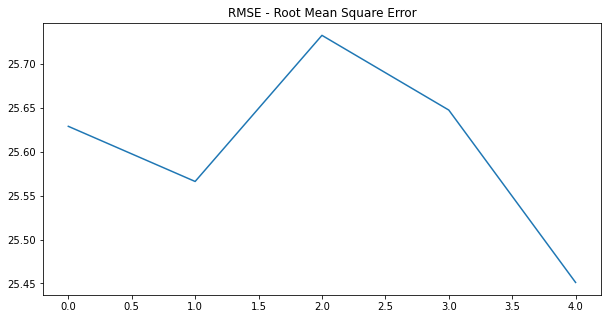

In [102]:
RMSE = np.array([])
for i in range(maxFutureStep):
  rmse = sqrt(mean_squared_error(y_pred_agg[i], y_true[:predSize]))
  print('Test RMSE of future step %2s: %.3f' % (i+1, rmse))
  RMSE = np.append(RMSE, rmse)

plt.figure(figsize=(10,5))
plt.plot(RMSE)
plt.title("RMSE - Root Mean Square Error")
plt.show()

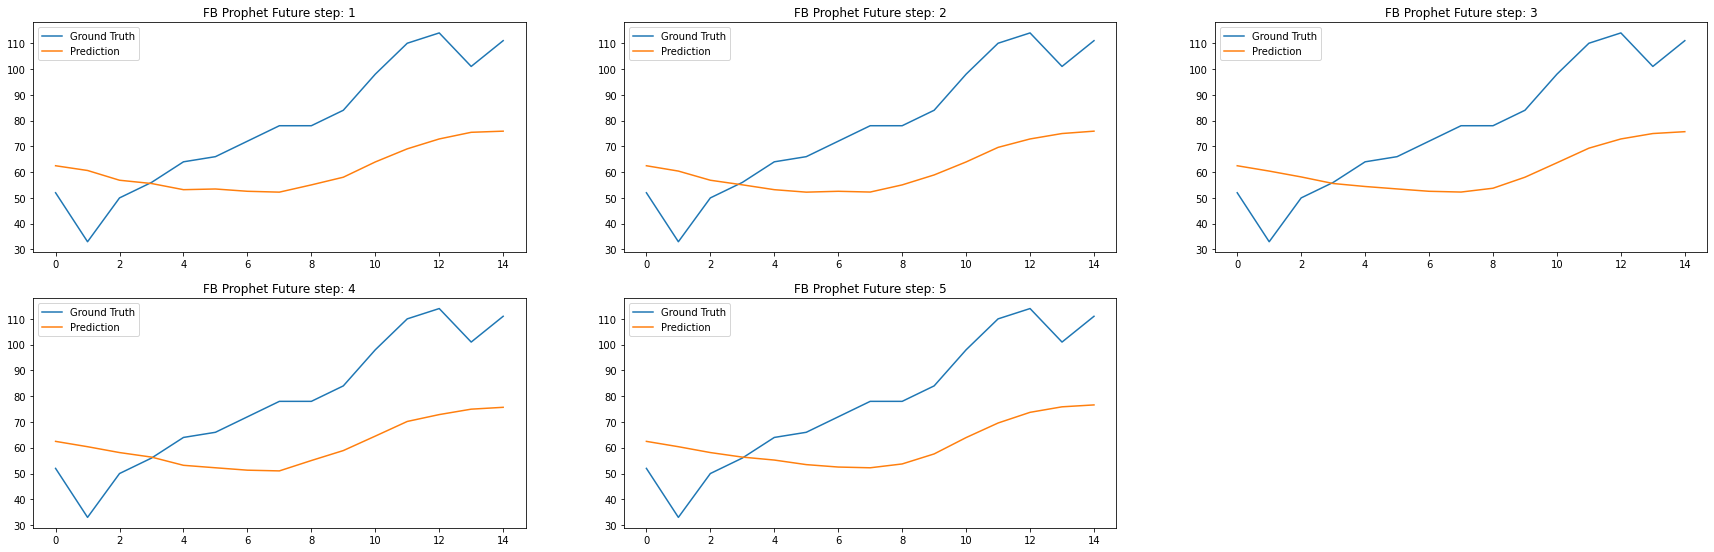

In [103]:
plt.figure(figsize=(30,60))
for i in range(maxFutureStep):
  plt.subplot(12, 3, i+1)
  plt.plot(y_true[:predSize], label='Ground Truth')
  plt.plot(y_pred_agg[i][:predSize], label='Prediction')
  plt.title("FB Prophet" + " Future step: " + str(i+1))
  plt.legend()
plt.show()

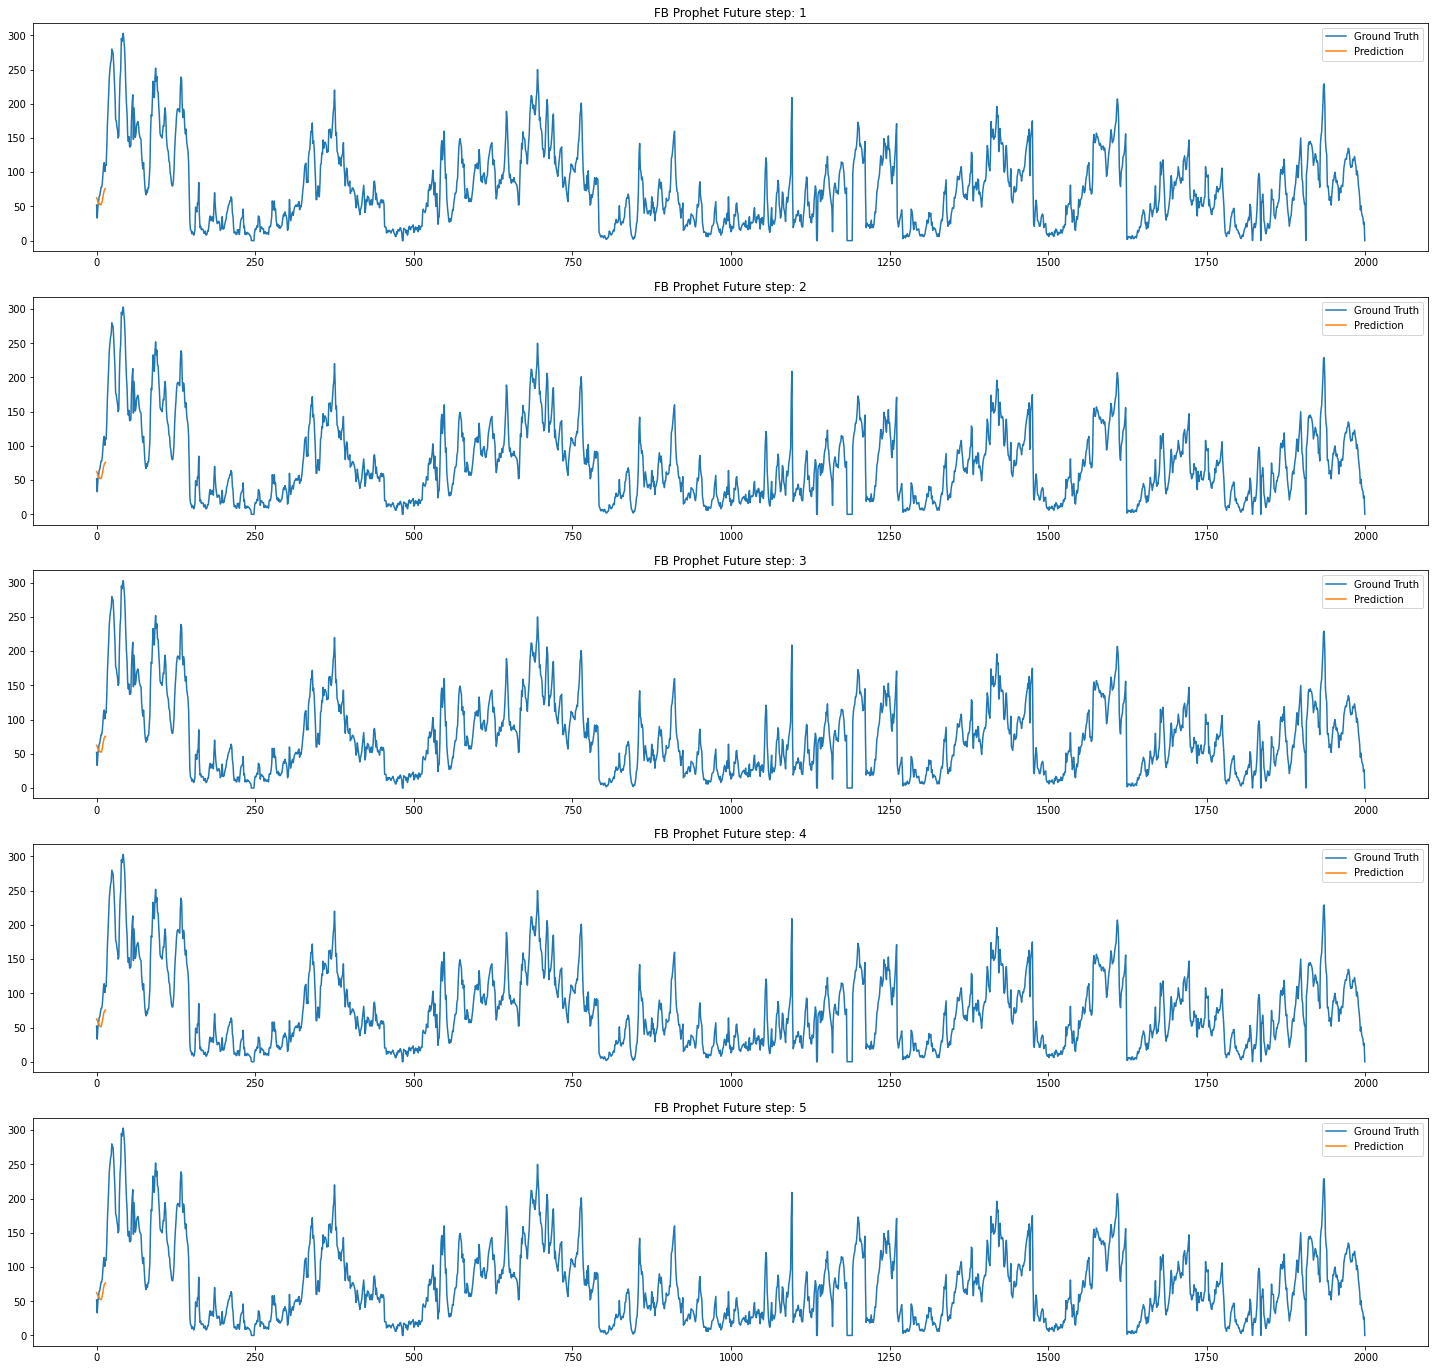

In [104]:
plt.figure(figsize=(25, 24*5))
for i in range(maxFutureStep):
  plt.subplot(24, 1, i+1)
  plt.plot(y_true[:2000], label='Ground Truth')
  plt.plot(y_pred_agg[i][:2000], label='Prediction')
  plt.title("FB Prophet" + " Future step: " + str(i+1))
  plt.legend()
plt.show()

In [105]:
# pastStep = 24 # modify here to choose past steps
# maxFutureStep = 24  # modify here to choose future steps
# trainingSize = 10
# predSize = 5
# y_pred_agg = np.array([])

# print("\ntrain prophet model")
# model_y = Prophet(interval_width=0.95)
# model_y.fit(train[-10:])
# print("train prophet model finished\n")

# var_names = [x for x in df_processed.columns if (x != 'ds' and x!= 'y')]

# # for each future step
# for futureStep in range(1, maxFutureStep+1, 1): 
#   print("\nfutureStep: ", str(futureStep))
#   prediction = pd.DataFrame()
  
#   if futureStep > 1:
#     # predict variables first
#     for var in var_names:
#       var_pred = var_prediction(var, df_processed, trainingSize, predSize, futureStep)
#       prediction[var] = var_pred
    
#   # predict y 
#   y_prediction = np.array([])
#   for i in range(0, predSize, futureStep):
#     for j in range(0, futureStep):
#       print("\nfutureStep:", str(futureStep), " i:", str(i), " j:", str(j))
#       if j == 0:
#         pastData = df_processed[['y', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']][n_train_hours-24+i+j:n_train_hours+i]
#         pastData_reframed = series_to_supervised(pastData, 24, 0)
#         pastData_reframed['ds'] = df_processed['ds'][n_train_hours+i+j]
#         #print("\npastData_reframed")
#         #print(pastData_reframed)
#         yhat = model_y.predict(pastData_reframed)['yhat']
#         y_prediction = np.append(y_prediction, yhat)
#         print("\ny_prediction")
#         print(y_prediction)
#       else:
#         pastData = pastData.iloc[1:].reset_index(drop=True)
#         #print("\npastData")
#         #print(pastData)

#         predData = prediction[['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']][j:j+1].reset_index(drop=True)
#         predData['y'] = yhat
#         #print("\npredData")
#         #print(predData)

#         pastData = pastData.append(predData, ignore_index=True)
#         pastData_reframed = series_to_supervised(pastData, 24, 0)
#         pastData_reframed['ds'] = df_processed['ds'][n_train_hours+i+j]
#         #print("\npastData_reframed")
#         #print(pastData_reframed)
#         yhat = model_y.predict(pastData_reframed)['yhat']
#         y_prediction = np.append(y_prediction, yhat)

#         print("\npastData_reframed")
#         print(pastData_reframed)
#         print("\ny_prediction")
#         print(y_prediction)

#   y_prediction = y_prediction[:predSize]
#   if futureStep == 1:
#     y_pred_agg = np.array([y_prediction])
#   else:
#     y_pred_agg = np.append(y_pred_agg, np.array([y_prediction]),axis = 0)
#   print("\ny_pred_agg")
#   print(y_pred_agg)

In [106]:
# plt.figure(figsize=(15, 10*7))
# i = 1
# for var in var_names:
#   plt.subplot(24, 1, i)
#   i += 1
#   plt.plot(test[var][:predSize].values, label='Ground Truth')
#   plt.plot(prediction[var][:predSize].values, label='Prediction')
#   plt.title(var + " prediction")
#   plt.legend()
# plt.show()